In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sg_data.csv")
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [3]:
#check for duplicate values
temp = df.Player.value_counts()
temp[temp>1]

Victor Oladipo    9
James Harden      9
Name: Player, dtype: int64

In [4]:
#average out the duplicates
n_df = df.groupby('Player').mean().reset_index()

In [5]:
#double check if duplicates still exist
temp = n_df.Player.value_counts()
temp[temp>1]

Series([], Name: Player, dtype: int64)

### Select and prep the data

In [6]:
sgdf = n_df[['PTS','AST','TRB','TOV','STL','BLK','USG%','BPM']]
sgdf.head()

,PTS,AST,TRB,TOV,STL,BLK,USG%,BPM
0,1.6,0.6,0.6,0.3,0.3,0.1,16.2,-6.6
1,11.1,2.1,4.6,1.1,0.8,0.3,19.3,0.5
2,2.9,0.4,0.8,0.4,0.2,0.0,14.9,-2.8
3,9.0,1.2,2.3,0.8,0.2,0.2,20.6,-1.6
4,14.6,2.4,3.7,1.6,0.7,0.3,25.1,-5.1


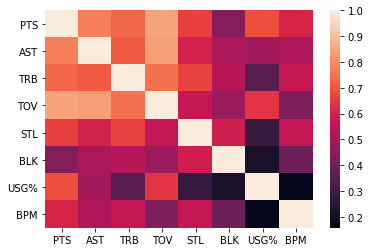

In [7]:
import seaborn as sns
temp = sgdf.corr()
sns.heatmap(temp)

In [8]:
sgdf.describe()

,PTS,AST,TRB,TOV,STL,BLK,USG%,BPM
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,9.487288,1.990960,2.673446,1.094068,0.647458,0.259887,19.052825,-2.825989
std,6.955946,1.700643,1.575414,0.829508,0.392605,0.214328,5.871242,5.307849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,-22.200000
25%,4.750000,0.900000,1.425000,0.500000,0.300000,0.100000,15.000000,-3.600000
50%,8.050000,1.600000,2.500000,0.900000,0.700000,0.200000,18.550000,-2.100000
75%,12.500000,2.650000,3.875000,1.400000,0.900000,0.400000,22.600000,-0.325000
max,32.800000,11.166667,6.933333,4.300000,1.700000,1.000000,36.600000,6.900000


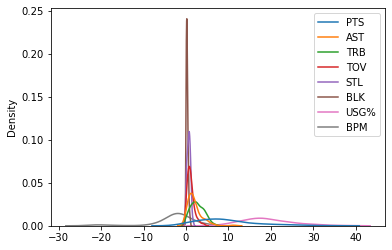

In [9]:
sns.kdeplot(data = sgdf)

In [26]:
from sklearn.preprocessing import StandardScaler
stan_scale = StandardScaler()
stan_scale.fit(sgdf)

C:\Users\David\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
from sklearn import preprocessing
norm = preprocessing.normalize(sgdf)
norm_df = pd.DataFrame(norm, columns=sgdf.columns)
norm_df.head()

,PTS,AST,TRB,TOV,STL,BLK,USG%,BPM
0,0.090952,0.034107,0.034107,0.017053,0.017053,0.005684,0.920886,-0.375176
1,0.485156,0.091786,0.201056,0.048079,0.034966,0.013112,0.843559,0.021854
2,0.187483,0.025860,0.051720,0.025860,0.012930,0.000000,0.963277,-0.181019
3,0.396445,0.052859,0.101314,0.035240,0.008810,0.008810,0.907419,-0.070479
4,0.488907,0.080368,0.123901,0.053579,0.023441,0.010046,0.840519,-0.170783


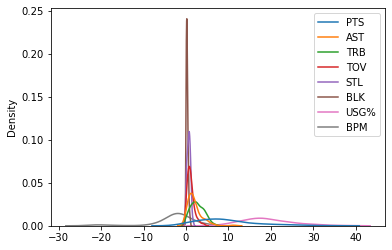

In [10]:
sns.kdeplot(data = sgdf)

### PCA

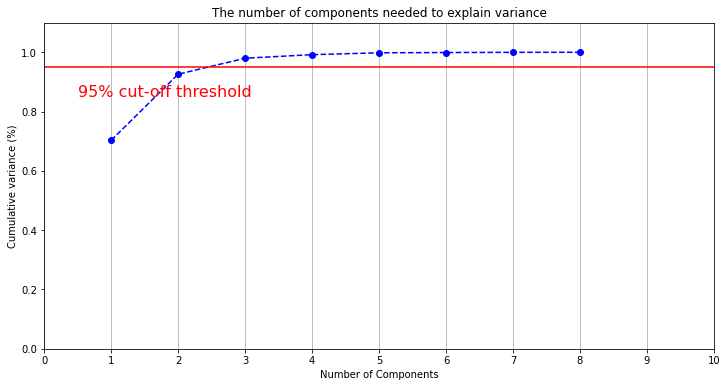

In [11]:
from sklearn.decomposition import PCA   
pca = PCA().fit(sgdf)

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1,9,step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker = 'o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [12]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(sgdf)
prin_df = pd.DataFrame(data = prin_comp, columns = ['PC1','PC2'])
prin_df.head()

,PC1,PC2
0,-9.291940,1.533369
1,2.848782,-2.543794
2,-7.536293,-2.217363
3,0.688658,0.208920
4,6.237803,5.335485


### K-Mean Clustering

In [13]:
from sklearn.cluster import KMeans

In [14]:
tots_within = []
for k in range(1,14):
    km = KMeans(max_iter = 300, random_state = 42, 
                init= 'random', n_clusters = k)
    km = km.fit(prin_df)
    tots_within.append(km.inertia_)

### Cluster Selection/Verification using Elbow Method


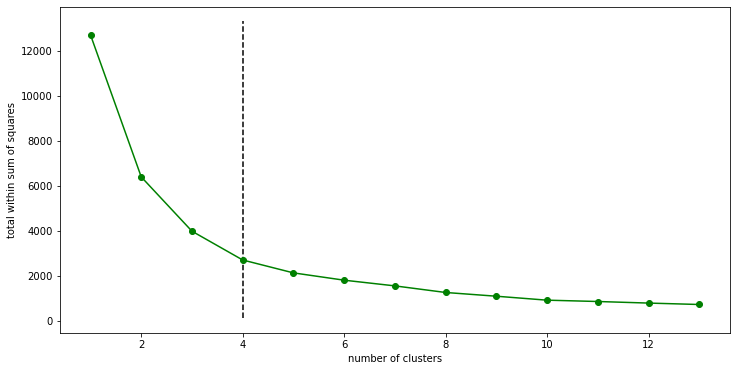

In [15]:
#locating elbow location using kneeLocator
from kneed import KneeLocator

kl = KneeLocator(range(1,14), 
                 tots_within, 
                 curve = "convex", 
                 direction = "decreasing")

#locating the elbow point
fig, ax = plt.subplots()
ax.plot(range(1,14), tots_within, 'go-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')
plt.vlines(kl.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [17]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(sgdf)
y_kmeans

array([0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2,
       0, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 2, 2,
       2, 0, 0, 2, 0, 3, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 1, 2, 3, 2, 0, 0, 2, 0, 3, 2, 2, 0, 0, 0, 3,
       2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 3, 2, 0, 0,
       3, 2, 0, 2, 1, 2, 0, 1])

### Append the cluster

In [18]:
sgdf['y_kmeans'] = pd.Series(y_kmeans)
player = n_df['Player']
clusdf = sgdf.join(player)
clusdf.head()

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PTS,AST,TRB,TOV,STL,BLK,USG%,BPM,y_kmeans,Player
0,1.6,0.6,0.6,0.3,0.3,0.1,16.2,-6.6,0,Adam Mokoka
1,11.1,2.1,4.6,1.1,0.8,0.3,19.3,0.5,2,Alec Burks
2,2.9,0.4,0.8,0.4,0.2,0.0,14.9,-2.8,0,Amir Coffey
3,9.0,1.2,2.3,0.8,0.2,0.2,20.6,-1.6,2,Anfernee Simons
4,14.6,2.4,3.7,1.6,0.7,0.3,25.1,-5.1,2,Anthony Edwards


In [19]:
filt_zero = clusdf[y_kmeans == 0]
filt_one = clusdf[y_kmeans == 1]
filt_two = clusdf[y_kmeans == 2]
filt_three = clusdf[y_kmeans == 3]

In [25]:
filt_zero

,PTS,AST,TRB,TOV,STL,BLK,USG%,BPM,y_kmeans,Player
0,1.6,0.6,0.6,0.3,0.3,0.1,16.2,-6.6,0,Adam Mokoka
2,2.9,0.4,0.8,0.4,0.2,0.0,14.9,-2.8,0,Amir Coffey
5,7.3,2.0,2.2,1.0,0.6,0.0,16.3,-3.0,0,Austin Rivers
6,8.5,1.4,1.8,0.9,0.7,0.1,16.7,-3.2,0,Avery Bradley
15,5.0,0.4,1.0,0.2,0.3,0.1,19.5,-4.3,0,Carsen Edwards
16,1.1,0.0,0.4,0.1,0.0,0.3,19.2,-7.9,0,Cassius Stanley
18,2.0,0.7,2.0,0.7,1.0,0.7,14.6,-8.9,0,DaQuan Jeffries
19,6.0,1.6,0.9,0.1,0.1,0.4,17.7,-3.6,0,Dakota Mathias
20,6.2,1.5,3.3,0.4,0.6,0.1,12.1,-1.1,0,Damion Lee
22,3.8,2.2,2.8,1.2,0.7,0.3,12.5,-3.1,0,Dante Exum


In [26]:
filt_one

,PTS,AST,TRB,TOV,STL,BLK,USG%,BPM,y_kmeans,Player
9,32.800000,4.700000,5.200000,3.1,1.3,0.500000,36.200000,4.900000,1,Bradley Beal
13,26.700000,5.000000,3.900000,1.0,1.3,0.300000,28.500000,6.900000,1,CJ McCollum
14,18.500000,6.000000,4.300000,2.2,1.1,0.500000,31.200000,0.600000,1,Caris LeVert
17,22.800000,4.300000,2.500000,2.5,1.1,0.200000,27.100000,0.100000,1,Collin Sexton
29,24.400000,4.400000,3.700000,3.5,0.9,0.300000,30.700000,-0.900000,1,Devin Booker
30,24.200000,5.100000,4.400000,3.0,0.9,0.400000,31.400000,1.700000,1,Donovan Mitchell
36,18.700000,2.700000,2.200000,1.9,0.5,0.500000,24.900000,1.100000,1,Eric Gordon
37,20.400000,6.600000,4.200000,2.1,1.7,0.700000,23.700000,2.800000,1,Fred VanVleet
50,24.533333,11.166667,6.933333,4.3,1.0,0.800000,26.866667,5.600000,1,James Harden
53,25.900000,3.600000,5.500000,2.8,1.2,0.600000,31.400000,4.400000,1,Jaylen Brown


In [27]:
filt_two

,PTS,AST,TRB,TOV,STL,BLK,USG%,BPM,y_kmeans,Player
1,11.1,2.1,4.6,1.1,0.8,0.3,19.3,0.5,2,Alec Burks
3,9.0,1.2,2.3,0.8,0.2,0.2,20.6,-1.6,2,Anfernee Simons
4,14.6,2.4,3.7,1.6,0.7,0.3,25.1,-5.1,2,Anthony Edwards
7,6.4,1.0,2.2,1.1,0.6,0.1,20.2,-4.0,2,Ben McLemore
8,9.9,2.1,3.8,1.2,0.4,0.1,18.6,-2.1,2,Bogdan Bogdanovic
10,2.5,1.0,1.0,1.0,0.3,0.3,25.0,-7.3,2,Brodric Thomas
11,9.5,0.5,1.1,0.7,0.3,0.0,18.7,-2.7,2,Bryn Forbes
12,16.1,3.0,4.8,2.0,0.9,0.3,20.7,-2.8,2,Buddy Hield
21,7.8,2.2,1.8,0.8,0.5,0.1,17.9,-3.2,2,Damyean Dotson
24,10.5,4.9,4.6,1.2,1.4,0.5,15.6,2.8,2,Delon Wright


In [20]:
filt_three

,PTS,AST,TRB,TOV,STL,BLK,USG%,BPM,y_kmeans,Player
23,0.0,0.3,0.0,0.0,0.0,0.0,17.3,-21.4,3,Deividas Sirvydis
49,0.0,0.0,0.5,0.5,0.0,0.0,10.7,-21.2,3,Jalen Harris
75,1.1,0.4,0.4,0.3,0.1,0.0,29.9,-20.0,3,Markus Howard
81,1.3,0.0,0.0,0.3,0.2,0.2,36.6,-17.8,3,Nate Hinton
87,0.8,0.6,0.4,1.2,0.2,0.0,21.2,-22.2,3,Quinndary Weatherspoon
106,0.2,0.0,0.1,0.0,0.0,0.0,14.7,-17.4,3,Theo Pinson
110,0.0,0.3,0.3,0.0,0.0,0.0,16.8,-21.2,3,Ty-Shon Alexander


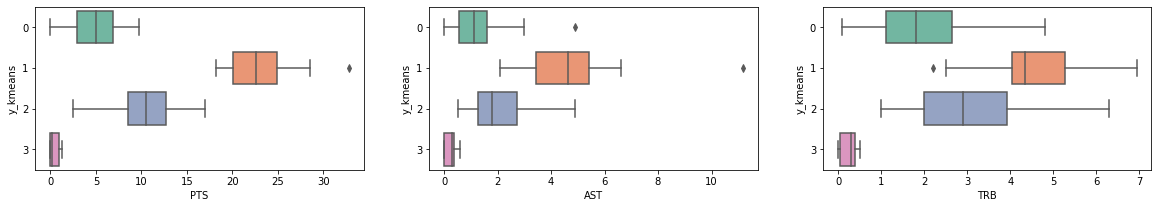

In [21]:
fig, axes = plt.subplots(figsize = (20,3))
####### PTS, AST, TRB, BLK, STL######
plt.subplot(1,3,1)
sns.boxplot(x = "PTS", y = "y_kmeans", data = clusdf, orient = "h", palette="Set2")
plt.subplot(1,3,2)
sns.boxplot(x = "AST", y = "y_kmeans", data = clusdf, orient = "h", palette="Set2")
plt.subplot(1,3,3)
sns.boxplot(x = "TRB", y = "y_kmeans", data = clusdf, orient = "h", palette="Set2")

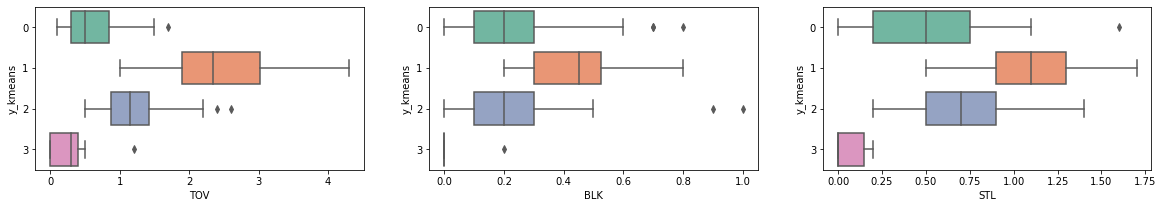

In [22]:
fig, axes = plt.subplots(figsize = (20,3))
####### PTS, AST, TRB, BLK, STL######
plt.subplot(1,3,1)
sns.boxplot(x = "TOV", y = "y_kmeans", data = clusdf, orient = "h", palette="Set2")
plt.subplot(1,3,2)
sns.boxplot(x = "BLK", y = "y_kmeans", data = clusdf, orient = "h", palette="Set2")
plt.subplot(1,3,3)
sns.boxplot(x = "STL", y = "y_kmeans", data = clusdf, orient = "h", palette="Set2")

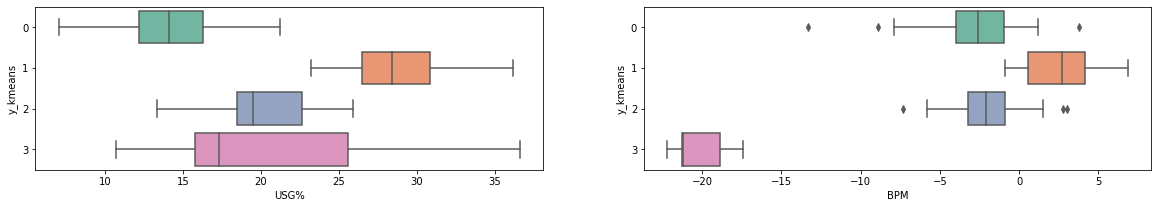

In [24]:
fig, axes = plt.subplots(figsize = (20,3))
####### USG%, BPM ######
plt.subplot(1,2,1)
sns.boxplot(x = "USG%", y = "y_kmeans", data = clusdf, orient = "h", palette="Set2")
plt.subplot(1,2,2)
sns.boxplot(x = "BPM", y = "y_kmeans", data = clusdf, orient = "h", palette="Set2")

In [29]:
filt_zero.describe()

,PTS,AST,TRB,TOV,STL,BLK,USG%,BPM,y_kmeans
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0
mean,4.829787,1.195745,1.976596,0.604255,0.514894,0.229787,14.389362,-2.863830,0.0
std,2.469634,0.872019,1.170324,0.401604,0.368297,0.209466,3.086593,2.965265,0.0
min,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000,7.000000,-13.300000,0.0
25%,2.950000,0.550000,1.100000,0.300000,0.200000,0.100000,12.150000,-3.950000,0.0
50%,5.000000,1.100000,1.800000,0.500000,0.500000,0.200000,14.100000,-2.600000,0.0
75%,6.850000,1.600000,2.650000,0.850000,0.750000,0.300000,16.250000,-0.950000,0.0
max,9.700000,4.900000,4.800000,1.700000,1.600000,0.800000,21.200000,3.800000,0.0


In [28]:
filt_one.describe()

,PTS,AST,TRB,TOV,STL,BLK,USG%,BPM,y_kmeans
count,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.0
mean,23.050000,4.839583,4.504167,2.543750,1.09375,0.441667,28.458333,2.514583,1.0
std,4.064444,2.168161,1.173843,0.880128,0.27921,0.179505,3.404714,2.306576,0.0
min,18.200000,2.100000,2.200000,1.000000,0.50000,0.200000,23.200000,-0.900000,1.0
25%,20.091667,3.450000,4.050000,1.900000,0.90000,0.300000,26.450000,0.575000,1.0
50%,22.650000,4.633333,4.350000,2.350000,1.10000,0.450000,28.433333,2.700000,1.0
75%,24.875000,5.400000,5.275000,3.025000,1.30000,0.525000,30.825000,4.175000,1.0
max,32.800000,11.166667,6.933333,4.300000,1.70000,0.800000,36.200000,6.900000,1.0


In [30]:
filt_two.describe()

,PTS,AST,TRB,TOV,STL,BLK,USG%,BPM,y_kmeans
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,10.839583,2.077083,3.100000,1.202083,0.712500,0.262500,20.195833,-2.039583,2.0
std,3.304139,1.040712,1.304004,0.479135,0.292913,0.200664,2.894305,2.056514,0.0
min,2.500000,0.500000,1.000000,0.500000,0.200000,0.000000,13.300000,-7.300000,2.0
25%,8.575000,1.275000,2.000000,0.875000,0.500000,0.100000,18.425000,-3.200000,2.0
50%,10.550000,1.800000,2.900000,1.150000,0.700000,0.200000,19.450000,-2.100000,2.0
75%,12.725000,2.725000,3.925000,1.425000,0.900000,0.300000,22.600000,-0.875000,2.0
max,17.000000,4.900000,6.300000,2.600000,1.400000,1.000000,25.900000,3.000000,2.0


In [31]:
filt_three.describe()

,PTS,AST,TRB,TOV,STL,BLK,USG%,BPM,y_kmeans
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0
mean,0.485714,0.228571,0.242857,0.328571,0.071429,0.028571,21.028571,-20.171429,3.0
std,0.566947,0.236039,0.207020,0.430946,0.095119,0.075593,9.126101,1.874135,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.700000,-22.200000,3.0
25%,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,15.750000,-21.300000,3.0
50%,0.200000,0.300000,0.300000,0.300000,0.000000,0.000000,17.300000,-21.200000,3.0
75%,0.950000,0.350000,0.400000,0.400000,0.150000,0.000000,25.550000,-18.900000,3.0
max,1.300000,0.600000,0.500000,1.200000,0.200000,0.200000,36.600000,-17.400000,3.0
